# Oil wells reserach

##  Business problem descitption and plan of work 

**Business Task:**

The company "GlavRosGosNeft" faces the task of determining where to drill a new well.

Oil samples from three regions have been provided for analysis: each region has 10,000 oil fields where the quality of the oil and its reserves have been measured. The goal is to build a machine learning model that will help identify the region where extraction will yield the highest profit. Then, the potential profit and risks should be analyzed using the *Bootstrap* technique.

Steps for selecting a location:

- In the chosen region, identify the oil fields and determine the feature values for each.
- Build a model and estimate the reserves.
- Select the oil fields with the highest estimated values. The number of selected fields depends on the company's budget and the cost of developing a single well.
- Profit equals the total profit from the selected fields.

**Work Plan:**

1) Data Loading:
   - Import datasets for analysis.
   - Import libraries.

2) Data Preprocessing:
   - Perform data cleaning to handle missing values and remove duplicates.
   - Convert data types as necessary.

3) Exploratory Data Analysis:
   - Correlation analysis.
   - Statistical analysis.

4) Calculate profit for the best oil fields.
5) Analyze profit and risks using the Bootstrap technique.
6) Final conclusions.

**Datasets:**

**geo_data_0.csv**
**geo_data_1.csv**
**geo_data_2.csv**
- Contains data from geological surveys across three regions.
- f0, f1, f2 — three features of the points.
- Contains the target feature `product` (volume of reserves in the well).


## Data loading and wrangling

### Load data 

In [6]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os #dataset import

#import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
# data prepara

# models
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

# metrics
from sklearn.metrics import  mean_squared_error
             
import warnings
warnings.filterwarnings("ignore", message=".*keepdims.*", category=FutureWarning)

In [7]:
pth1_geo_data_0 = 'geo_data_0.csv'
pth2_geo_data_0 = '/datasets/geo_data_0.csv'

pth1_geo_data_1 = 'geo_data_1.csv'
pth2_geo_data_1 = '/datasets/geo_data_1.csv'

pth1_geo_data_2 = 'geo_data_2.csv'
pth2_geo_data_2 = '/datasets/geo_data_2.csv'

# read files 
if os.path.exists(pth1_geo_data_0):
    df_geo_data_0 = pd.read_csv(pth1_geo_data_0)
elif os.path.exists(pth2_geo_data_0):
    df_geo_data_0 = pd.read_csv(pth2_geo_data_0)
else:
    print('Something is wrong with geo_data_0.csv')

if os.path.exists(pth1_geo_data_1):
    df_geo_data_1 = pd.read_csv(pth1_geo_data_1)
elif os.path.exists(pth2_geo_data_1):
    df_geo_data_1 = pd.read_csv(pth2_geo_data_1)
else:
    print('Something is wrong with geo_data_1.csv')

if os.path.exists(pth1_geo_data_2):
    df_geo_data_2 = pd.read_csv(pth1_geo_data_2)
elif os.path.exists(pth2_geo_data_2):
    df_geo_data_2 = pd.read_csv(pth2_geo_data_2)
else:
    print('Something is wrong with geo_data_2.csv')


In [8]:
df_geo_data_0.head(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


In [9]:
df_geo_data_1.head(3)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


In [10]:
df_geo_data_2.head(3)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


### Data Wrangling

In [12]:
df_geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df_geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
df_geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
# Проверим на дупликаты
print(df_geo_data_0.duplicated().sum())
print(df_geo_data_1.duplicated().sum())
print(df_geo_data_2.duplicated().sum())

0
0
0


In [16]:
print(df_geo_data_0['id'].duplicated().sum())
print(df_geo_data_1['id'].duplicated().sum())
print(df_geo_data_2['id'].duplicated().sum())

10
4
4



**Conclusion:**

- The datasets contain 1,000,000 observations, 4 features, plus an ID.
- No missing values were found.
- A check for duplicates was performed; duplicate IDs were found, but since their number is small, we will not delete them.
- Data types are in order.


### Statistical analysis

In [19]:
df_geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [20]:
df_geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [21]:
df_geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [22]:
print((df_geo_data_0['product'] == 0).sum())
print((df_geo_data_1['product'] == 0).sum())
print((df_geo_data_2['product'] == 0).sum())

1
8235
1


В датасете df_geo_data_1 можно наблюдать много нулевых значений. Не будем их удалять или заполнять, так как они несут в себе важную информацию о том, что объем запасов нефти в этих точках нулевой. 

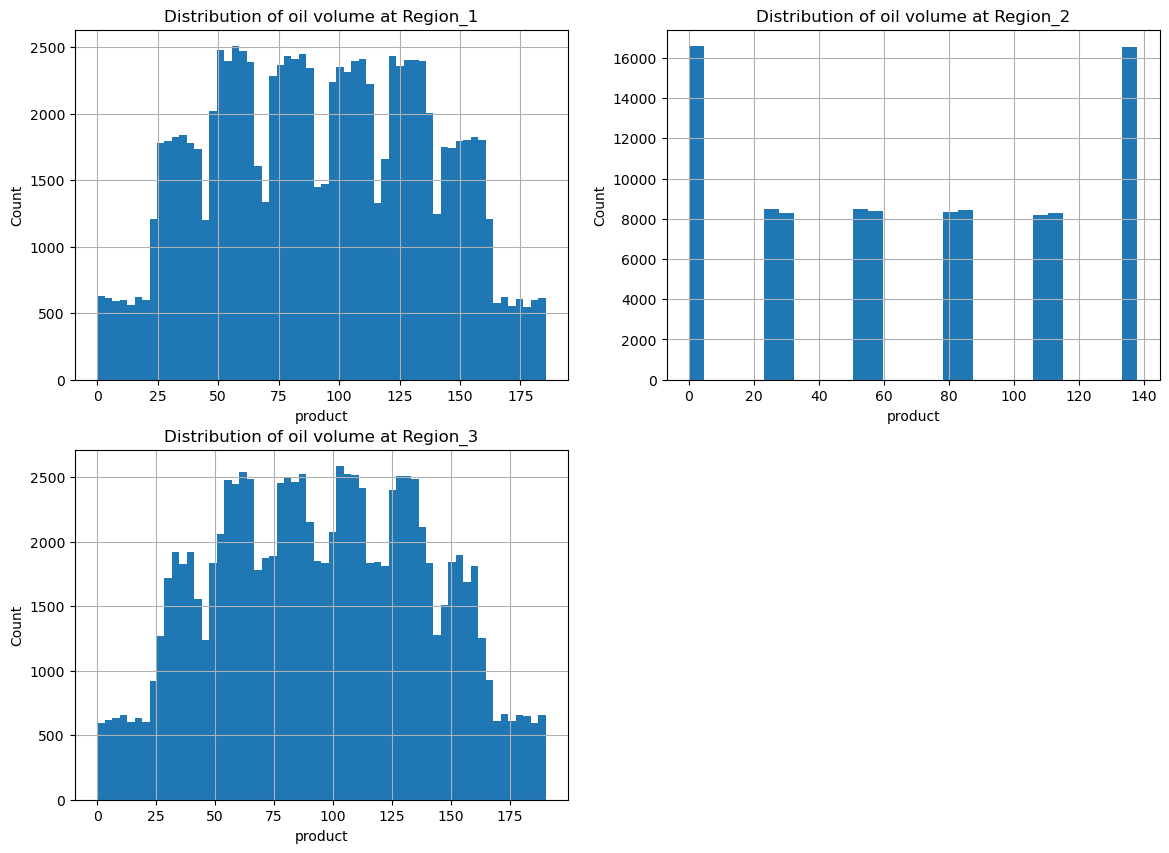

In [24]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
df_geo_data_0['product'].hist(bins=60)
plt.title('Distribution of oil volume at Region_1')
plt.xlabel('product')
plt.ylabel('Count')

plt.subplot(2,2,2)
df_geo_data_1['product'].hist(bins = 30)
plt.title('Distribution of oil volume at Region_2')
plt.xlabel('product')
plt.ylabel('Count')

plt.subplot(2,2,3)
df_geo_data_2['product'].hist(bins=60)
plt.title('Distribution of oil volume at Region_3')
plt.xlabel('product')
plt.ylabel('Count')


plt.show()


- The distribution for region 2 does not appear as normal as for regions 1 and 3.
- The distribution for region 2 is multimodal, with most of the data concentrated in specific chunks.


Lets check the boxplot:

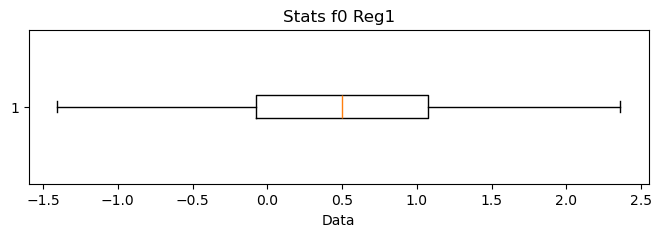

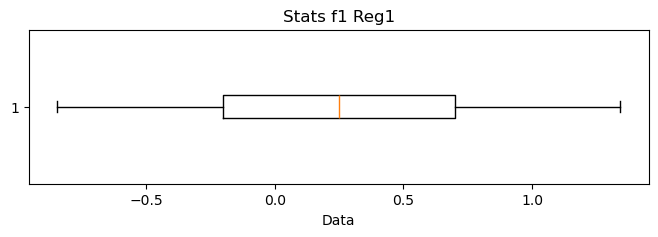

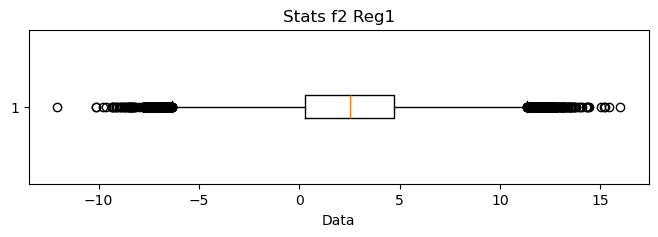

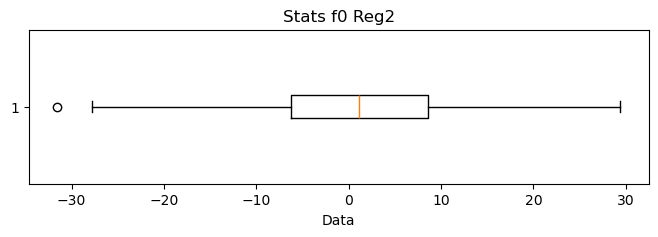

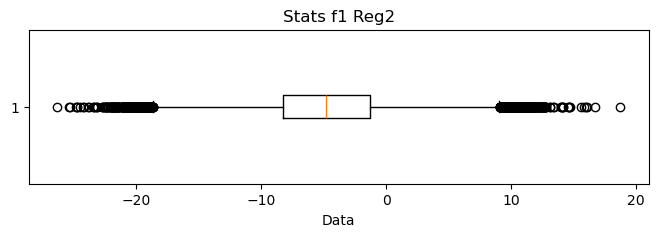

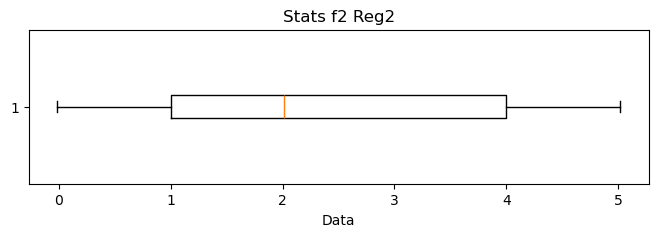

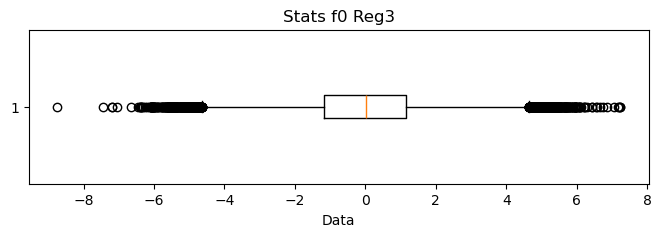

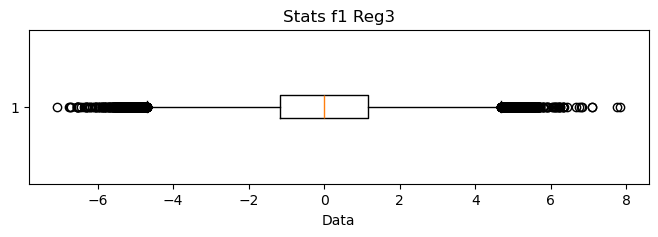

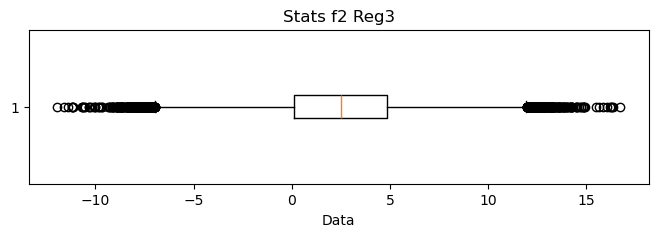

In [27]:
datasets = {
    'Reg1': df_geo_data_0,
    'Reg2': df_geo_data_1,
    'Reg3': df_geo_data_2
}

features = ['f0', 'f1', 'f2']

for region, df in datasets.items():
    for feature in features:
        plt.figure(figsize=(8, 2))
        plt.boxplot(df[feature], vert=False)
        plt.xlabel('Data')
        plt.title(f'Stats {feature} {region}')
        plt.show()

In [28]:
print(df_geo_data_0.shape)
df_geo_data_0 = df_geo_data_0[(df_geo_data_0['f2'] > -6) & (df_geo_data_0['f2'] < 11)]
print(df_geo_data_0.shape)

(100000, 5)
(99249, 5)


In [29]:
print(df_geo_data_1.shape)
df_geo_data_1 = df_geo_data_1[(df_geo_data_1['f1'] > -18) & (df_geo_data_1['f1'] < 9)]
print(df_geo_data_1.shape)

(100000, 5)
(99194, 5)


In [30]:
print(df_geo_data_2.shape)
df_geo_data_2 = df_geo_data_2[
                (df_geo_data_2['f0'] > -4) &
                 (df_geo_data_2['f0'] < 4) &
                 (df_geo_data_2['f1'] > -4) &
                 (df_geo_data_2['f1'] < 4) &
                (df_geo_data_2['f2'] > -6) &
                 (df_geo_data_2['f2'] < 12) ]
                    
print(df_geo_data_2.shape)

(100000, 5)
(94947, 5)


### Correlation analysis

In [32]:
df_geo_data_0 = df_geo_data_0.set_index('id')

In [33]:
#region 1
reg1 = df_geo_data_0.corr()
reg1

,f0,f1,f2,product
f0,1.000000,-0.440770,-0.003119,0.143698
f1,-0.440770,1.000000,0.001008,-0.192877
f2,-0.003119,0.001008,1.000000,0.478095
product,0.143698,-0.192877,0.478095,1.000000


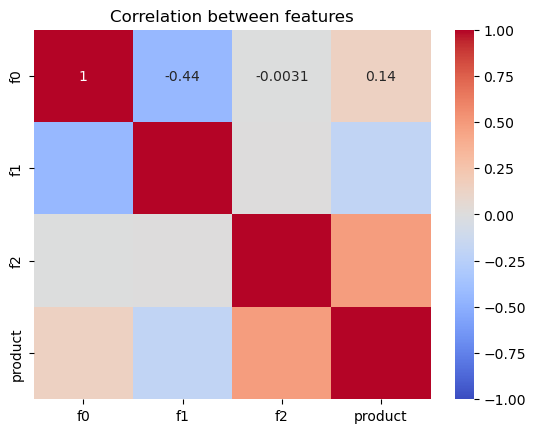

In [34]:
sns.heatmap(reg1, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation between features')
plt.show()

In [35]:
df_geo_data_1 = df_geo_data_1.set_index('id')

In [36]:
#region 2
reg2 = df_geo_data_1.corr()
reg2

,f0,f1,f2,product
f0,1.000000,0.178281,-0.001509,-0.030228
f1,0.178281,1.000000,-0.002183,-0.009581
f2,-0.001509,-0.002183,1.000000,0.999397
product,-0.030228,-0.009581,0.999397,1.000000


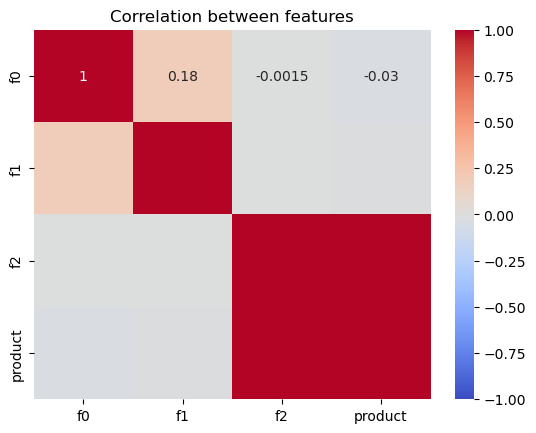

In [37]:
sns.heatmap(reg2, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation between features')
plt.show()

In [38]:
df_geo_data_2 = df_geo_data_2.set_index('id')

In [39]:
#region 3
reg3 = df_geo_data_2.corr()
reg3

,f0,f1,f2,product
f0,1.000000,0.000977,-0.000233,-0.003288
f1,0.000977,1.000000,0.002348,0.000772
f2,-0.000233,0.002348,1.000000,0.438084
product,-0.003288,0.000772,0.438084,1.000000


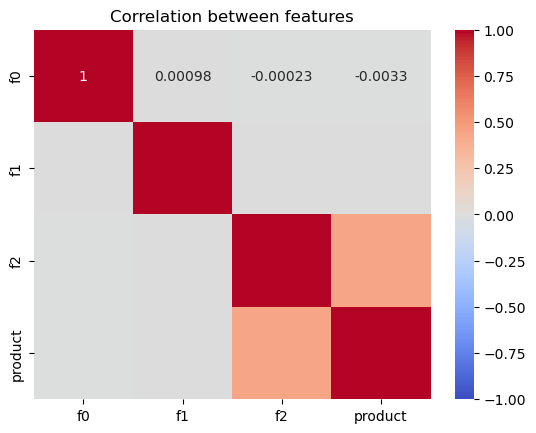

In [40]:
sns.heatmap(reg3, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation between features')
plt.show()



- A high correlation can be observed for region 2 between feature f2 and the target feature product (0.99).
- In the other regions, a similar situation is observed— the correlation between f2 and product is much higher than between other features.
- We can conclude that f2 is a very important feature and will have a strong impact on the target parameter.



## Model Training 

In [43]:
"""
datasets - dictionary for all datasets (3 regions) 
res - dictionary for storing the results 
final_result_df - dataframe for storing the results 
"""
datasets = {'region_1': df_geo_data_0,
            'region_2': df_geo_data_1,
            'region_3': df_geo_data_2}
res = {}
final_result_df = pd.DataFrame()

In [44]:
for region, df in datasets.items():
    # split data to train and validation 
    X = df.drop(columns = ['product'])
    y = df['product']

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42)

    # train model using Linear Regression  
    model = LinearRegression()
    model.fit(X_train, y_train)

    #predict on validation sample  
    y_pred = model.predict(X_valid)

    #calculate mean value for prediction  
    mean_pred = np.mean(y_pred)

    #calculate rmse metric
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    # store the results in the dictionary res
    res[region] = {
        'mean_pred': mean_pred, 
        'rmse': rmse
    }
    
    result_df = pd.DataFrame({
        'region': region,
        'actual': y_valid, 
        'predicted': y_pred})
    
    final_result_df = pd.concat([final_result_df, result_df] )
    

In [45]:
#diaply the results
for region, metrics in res.items():
    print(f'Region: {region}')
    print(f'Mean predicted reserve volume: {metrics["mean_pred"]}')
    print(f'RMSE: {metrics["rmse"]}')
    print('-----------------------')

Region: region_1
Mean predicted reserve volume: 92.5217350230591
RMSE: 37.680290611151165
-----------------------
Region: region_2
Mean predicted reserve volume: 68.58231044861962
RMSE: 0.8956835106487105
-----------------------
Region: region_3
Mean predicted reserve volume: 94.88195475323693
RMSE: 40.17277018812719
-----------------------


**Results**
- The RMSE metric shows that, on average, the deviation from the true value is 37 and 40 thousand barrels, which is quite significant compared to the predicted values.
- At the same time, region 2 shows a good result, with an RMSE of only 0.89, which is a very low deviation, indicating that the prediction result is very good.

## Revenue calculation 

The business has provided some additional data: 
- budget for the well drilling in the region is 10 billion rubles
- income from 1000 barrel is 450 000 rubles 

In [49]:
project_budget = 10_000_000_000
income_barrel = 450_000

Now we calculate the required volume of resources for the break-even development of a new well

During the exploration of the region, 500 locations are studied, from which the 200 best sites for development are selected using machine learning

In [52]:
required_volume = project_budget / income_barrel /200

In [53]:
print(f"Required volume of resources for break-even: {round(required_volume)} thousand barrels")

Required volume of resources for break-even: 111 thousand barrels



- With a budget of 10 billion rubles, 111 thousand barrels of oil need to be extracted for the project to break even.
- When compared with the predictions for the regions, the average extraction will be 92, 68, and 94 thousand barrels, which is below the minimum extraction required to cover the budget.
- This indicates a high likelihood of losses in developing wells in these regions.


## Calculation of revenue and risks

Let’s create a function to calculate the profit based on the selected wells and the model’s predictions.

In [57]:
final_result_df = final_result_df.reset_index()
final_result_df.head(2)

,id,region,actual,predicted
0,6SS8F,region_1,80.626136,64.044429
1,bYdnp,region_1,3.935675,70.104344


In [58]:
"""
Parameters: 
target - target values (actual volume of resources)
prediction - predicted by model values 
сount - number of wells with the highest predictions
income_barrel - income from barrel in rub
budget - project budjet (costs)
rev_total - total revenue for selected wells
"""
def revenue(target, prediction, count, income_barrel, budget):
    target_reset = target.reset_index(drop=True)
    prediction_reset = prediction.reset_index(drop=True)
    
    pred_sorted = prediction_reset.sort_values(ascending=False)
    selected_wells = target_reset.loc[pred_sorted.index[:count]]
"""
To calculate the profit from the wells, 
we multiply the sum of barrels from the top wells 
by the price per 1,000 barrels and subtract the costs
"""
     
    rev_total = (selected_wells.sum() * income_barrel) - budget
    return rev_total

IndentationError: unexpected indent (3108110132.py, line 22)

Now we calculate the risks and profit for each region.
We will apply the Bootstrap technique with 1,000 samples

In [ ]:
 
"""
Parameters:
top_well - top wells
n_boot / - number of bootstrap samples
region_results - dictionary for the results
profits_visual - dictionary for storing profits for visaulisation 
"""
top_wells = 200  
n_boot = 1000  
region_results = {}
profits_visual = {} 


# in the first loop we go trhough regions in final_result_df
regions = final_result_df['region'].unique()
for region in regions:
    # storing data in two df: target и probabilities
    region_df = final_result_df[final_result_df['region'] == region]
    target = region_df['actual']
    predictions = region_df['predicted']

    # calculate revenue using Bootstrap with 1000 samplings
    state = np.random.RandomState(12345)
    profits = []

    for i in range(n_boot):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = predictions.loc[target_subsample.index]
        
        rev = revenue(target_subsample, pred_subsample, top_wells, income_barrel, project_budget)
        profits.append(rev)
    """
    Convert the results to Series and calculate:
    # - mean revenue
    # - 95% confidence interval with 0.975 and 0.025 quantiles
    # - risk of loss
    """
    profits_s = pd.Series(profits)
    mean_profit = profits_s.mean()
    upper = profits_s.quantile(0.975)
    lower = profits_s.quantile(0.025)
    loss_risk = (profits_s < 0).mean()

    # storing the results to dictionary 
    region_results[region] = {
        'mean_profit': mean_profit,
        'upper_bound': upper,
        'lower_bound': lower,
        'risk_of_loss': loss_risk
    }
    
    profits_visual[region] = profits
    

In [ ]:
# display results pre region 
for region, metrics in region_results.items():
    print(f'Region: {region}')
    print(f'  Mean Profit: {metrics["mean_profit"]} RUB')
    print(f'  Confidence interval: {metrics["lower_bound"]} - {metrics["upper_bound"]} RUB')
    print(f'  Risk of loss: {metrics["risk_of_loss"] * 100}%')
        

Let’s visualize the results for each region using a histogram

In [ ]:

fig, axes = plt.subplots(nrows=len(regions), ncols = 1, figsize =(10,5*len(regions)))
    
for ax, region in zip(axes, regions):
    ax.hist(profits_visual[region], bins=30, alpha = 0.6, color ='blue')
    ax.axvline(region_results[region]['lower_bound'], color ='red', linestyle = '--', label='lower')
    ax.axvline(region_results[region]['upper_bound'], color = 'red', linestyle ='--', label ='upper')
    ax.set_title(f'Revenue distribution for {region}')
    ax.set_xlabel('Revenue (rub)')
    ax.set_ylabel('Density')
    ax.legend()
        
plt.tight_layout()
plt.show()
    


**The best region for well development: the second region**
- The highest average profit: 432 million rubles
- The lowest risk of losses: 1.9%
- The 95% confidence interval is quite wide, ranging between 32 million and 829 million rubles, which indicates an unreliable or not very accurate profit prediction.

